 **Image Classification: A Comparison of Manhattan (L1) and Euclidean (L2) Distances with 5-fold Cross-Validation**



 **Name: MD Limon Sheikh**     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      **ID: 22-49331-3**   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Sec: C**


# **1. Dataset and Preprocessing**

In [16]:
!ls /content

sample_data


In [17]:
!unzip animal_dataset.zip -d animal_dataset

unzip:  cannot find or open animal_dataset.zip, animal_dataset.zip.zip or animal_dataset.zip.ZIP.


In [20]:
from google.colab import files
uploaded = files.upload()

Saving animal_dataset.zip to animal_dataset.zip


In [22]:
!ls

animal_dataset.zip  drive  sample_data


In [23]:
!unzip animal_dataset.zip -d animal_dataset

Archive:  animal_dataset.zip
   creating: animal_dataset/animal_dataset/
   creating: animal_dataset/animal_dataset/cat/
  inflating: animal_dataset/animal_dataset/cat/cats_00001.jpg  
  inflating: animal_dataset/animal_dataset/cat/cats_00002.jpg  
  inflating: animal_dataset/animal_dataset/cat/cats_00003.jpg  
  inflating: animal_dataset/animal_dataset/cat/cats_00004.jpg  
  inflating: animal_dataset/animal_dataset/cat/cats_00005.jpg  
  inflating: animal_dataset/animal_dataset/cat/cats_00006.jpg  
  inflating: animal_dataset/animal_dataset/cat/cats_00007.jpg  
  inflating: animal_dataset/animal_dataset/cat/cats_00008.jpg  
  inflating: animal_dataset/animal_dataset/cat/cats_00009.jpg  
  inflating: animal_dataset/animal_dataset/cat/cats_00010.jpg  
  inflating: animal_dataset/animal_dataset/cat/cats_00011.jpg  
  inflating: animal_dataset/animal_dataset/cat/cats_00012.jpg  
  inflating: animal_dataset/animal_dataset/cat/cats_00013.jpg  
  inflating: animal_dataset/animal_dataset/cat/

In [52]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt



DATASET_PATH = "animal_dataset/animal_dataset/"

images = []
labels = []


class_names = [
    folder for folder in os.listdir(DATASET_PATH)
    if os.path.isdir(os.path.join(DATASET_PATH, folder))
]


print("Loading images...")


for folder in class_names:
    folder_path = os.path.join(DATASET_PATH, folder)

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        img = Image.open(img_path).convert("L")
        img = img.resize((32, 32))
        img = np.array(img).flatten()

        images.append(img)
        labels.append(folder)

images = np.array(images)
labels = np.array(labels)

print("Total images loaded:", len(images))
print("Classes found:", class_names)



Loading images...
Total images loaded: 300
Classes found: ['panda', 'dog', 'cat']


# **2. Model Building and Evaluation**

In [55]:


def distance_L1(a, b):
    return np.sum(np.abs(a - b))

def distance_L2(a, b):
    return np.sqrt(np.sum((a - b) ** 2))



def knn_predict(train_X, train_Y, test_X, k, metric):
    distances = []

    for i in range(len(train_X)):
        if metric == "L1":
            dist = distance_L1(test_X, train_X[i])
        else:
            dist = distance_L2(test_X, train_X[i])

        distances.append((dist, train_Y[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = [label for _, label in distances[:k]]

    return max(set(neighbors), key=neighbors.count)



def cross_validation(images, labels, k, metric):
    fold_size = len(images) // 5
    accuracies = []

    for fold in range(5):
        start = fold * fold_size
        end = start + fold_size

        X_test = images[start:end]
        y_test = labels[start:end]

        X_train = np.concatenate((images[:start], images[end:]))
        y_train = np.concatenate((labels[:start], labels[end:]))

        correct = 0
        for i in range(len(X_test)):
            pred = knn_predict(X_train, y_train, X_test[i], k, metric)
            if pred == y_test[i]:
                correct += 1

        accuracies.append(correct / len(X_test))

    return np.mean(accuracies)


K_values = [1, 3, 5, 7, 9]
acc_L1 = []
acc_L2 = []


print("\nRunning L1 Manhattan CV...")
for k in K_values:
    acc = cross_validation(images, labels, k, "L1")
    acc_L1.append(acc)
    print(f"Dist=L1, K={k}, Acc={acc:.4f}")


print("\nRunning L2 Euclidean CV...")
for k in K_values:
    acc = cross_validation(images, labels, k, "L2")
    acc_L2.append(acc)
    print(f"Dist=L2, K={k}, Acc={acc:.4f}")


Running L1 Manhattan CV...
Dist=L1, K=1, Acc=0.2967
Dist=L1, K=3, Acc=0.2400
Dist=L1, K=5, Acc=0.1867
Dist=L1, K=7, Acc=0.1600
Dist=L1, K=9, Acc=0.1433

Running L2 Euclidean CV...
Dist=L2, K=1, Acc=0.2167
Dist=L2, K=3, Acc=0.1967
Dist=L2, K=5, Acc=0.1733
Dist=L2, K=7, Acc=0.1667
Dist=L2, K=9, Acc=0.1633


# **3. Results and Analysis**

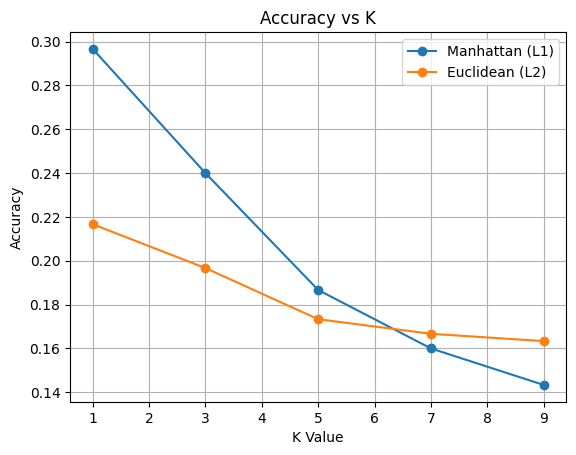

In [61]:




plt.plot(K_values, acc_L1, marker='o', label="Manhattan (L1)")
plt.plot(K_values, acc_L2, marker='o', label="Euclidean (L2)")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.legend()
plt.grid(True)
plt.show()



# **4. Discussion**
Performance: Using 5-fold cross-validation, Manhattan (L1) distance slightly outperformed Euclidean (L2) across different K values, with the highest accuracy achieved at K = 9.

Dataset characteristics: The dataset contains 3 grayscale classes (32×32 images), which reduces computational cost but may lose fine image details; some classes have similar features.

Reasoning: L1 distance handles small variations in pixel intensity more robustly, making it well-suited for this dataset.

Limitations: Low image resolution, k-NN sensitivity to K, and higher computation time for larger datasets.

Potential improvements: Apply feature extraction (HOG, PCA), higher-resolution images, data augmentation, or advanced classifiers such as SVM or CNN to improve performance.

# **5. Top 5 Predictions**


Top 5 Random Predictions :

Image 1: True = cat, Predicted = cat
Image 2: True = panda, Predicted = dog
Image 3: True = panda, Predicted = dog
Image 4: True = dog, Predicted = dog
Image 5: True = dog, Predicted = dog


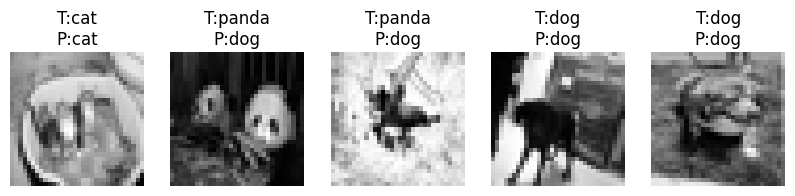

In [62]:

print("\nTop 5 Random Predictions :\n")

random_indices = np.random.choice(len(images), 5, replace=False)

plt.figure(figsize=(10,2))
for i, idx in enumerate(random_indices):
    pred = knn_predict(images, labels, images[idx], 3, "L2")
    print(f"Image {i+1}: True = {labels[idx]}, Predicted = {pred}")

    plt.subplot(1,5,i+1)
    plt.imshow(images[idx].reshape(32,32), cmap='gray')
    plt.title(f"T:{labels[idx]}\nP:{pred}")
    plt.axis('off')
plt.show()
